In [1]:
# import libraries we'll use
import spacy # fast NLP
import pandas as pd # dataframes
import langid # language identification (i.e. what language is this?)
from nltk.classify.textcat import TextCat # language identification from NLTK
from matplotlib.pyplot import plot # not as good as ggplot in R :p

In [2]:
AirData=pd.read_csv("reviews.csv")

In [3]:
AirData["comments"]=AirData["comments"].astype("str")

In [4]:
from spacy.lang.en import English
nlp = English()
doc = nlp(' '.join(str(AirData["comments"])))

In [5]:
doc

0                   O u r   s t a y   w i t h   M a r c u s   i n   B r i s t o l   w a s   f a n t a s t i c   . . . 
 1                   M a r c u s   i s   a   b r i l l i a n t ,   w a r m   a n d   f r i e n d l y   h o s t . . . . 
 2                   M y   m u m   A n g e l a   a n d   I   h a v e   s t a y e d   a t   M a r c u s '   a m a . . . 
 3                   M a r c u s   w a s   a n   e x c e p t i o n a l   h o s t .   I   o n l y   s t a y e d   . . . 
 4                   M a r c u s   w a s   w e l c o m i n g ,   e a s y   g o i n g   a n d   v e r y   h e l p . . . 
                                                                 . . .                                                 
 1 0 0 6 4 7         T h i s   w a s   i d e a l   f o r   m y   s t a y .   C l o s e   t o   m y   w o r k .   . . . 
 1 0 0 6 4 8         A m a z i n g   p l a c e   a n d   h o s t !   S t r o n g l y   r e c o m m e n d   t o   . . . 
 1 0 0 6 4 9         F a n t a s t i c   

In [7]:
ids_langid =AirData["comments"][0:5].apply(langid.classify)

In [14]:
pip install regex

Note: you may need to restart the kernel to use updated packages.


In [8]:
ids_langid = AirData["comments"].apply(langid.classify)

# get just the language label
langs = ids_langid.apply(lambda tuple: tuple[0])

# how many unique language labels were applied?
print("Number of tagged languages (estimated):")
print(len(langs.unique()))

# percent of the total dataset in English
print("Percent of data in English (estimated):")
print((sum(langs=="en")/len(langs))*100)

Number of tagged languages (estimated):
49
Percent of data in English (estimated):
95.1476374041251


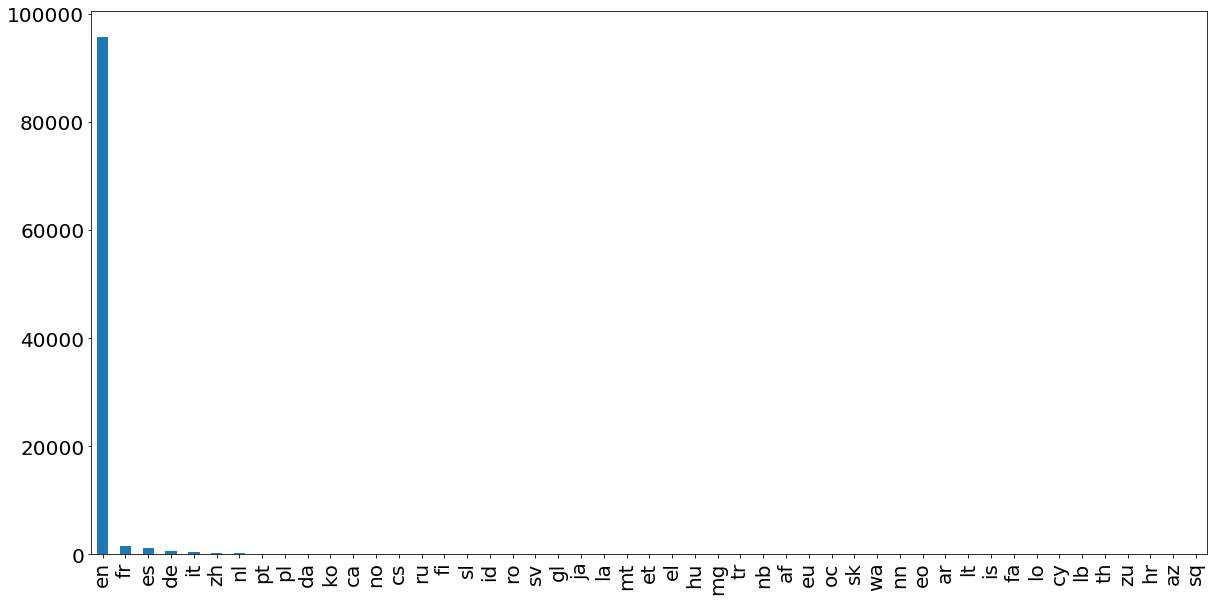

In [11]:
langs_df = pd.DataFrame(langs)

# count the number of times we see each language
langs_count = langs_df.comments.value_counts()

# horrible-looking barplot (I would suggest using R for visualization)
langs_count.plot.bar(figsize=(20,10), fontsize=20)

In [12]:
print("Languages with more than 400 tweets in our dataset:")
print(langs_count[langs_count > 400])

print("")

print("Percent of our dataset in these languages:")
print((sum(langs_count[langs_count > 400])/len(langs)) * 100)

Languages with more than 400 tweets in our dataset:
en    95768
fr     1469
es     1158
de      703
it      517
Name: comments, dtype: int64

Percent of our dataset in these languages:
98.96971744227636


In [9]:
English_comment=AirData["comments"][langs=='en']

In [10]:
English_comment

0         Our stay with Marcus in Bristol was fantastic ...
1         Marcus is a brilliant, warm and friendly host....
2         My mum Angela and I have stayed at Marcus' ama...
3         Marcus was an exceptional host. I only stayed ...
4         Marcus was welcoming, easy going and very help...
                                ...                        
100647    This was ideal for my stay. Close to my work. ...
100648    Amazing place and host! Strongly recommend to ...
100649    Fantastic apartment, great location. Would def...
100650    Found the apartment very clean and well looked...
100651    The place was clean & tidy, it had everything ...
Name: comments, Length: 95768, dtype: object

In [11]:
import re

def clean_html(raw_html): #Cleaning the reviews are required else Carrot2 fails
    cleanr = re.compile('<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});')
    cleantext = re.sub(cleanr, '', raw_html)
    return cleantext

In [ ]:
description=English_comment
description.str.encode('utf-8') #Your reviews might be here as a Series
reviews_descriptions=[]

temp_list=description.tolist() #Convert your reviews in a list
    
for item in temp_list: #Walk through each review
    clean_string=clean_html(item) #Clean it
    clean_string=clean_string.replace('\n','').replace('/','')
    reviews_descriptions.append(clean_string) #Append cleaned review to a list and then use this list to generate xml for Carrot2



#### Code for generating XML, instead of printing, you can output contents to a file, i.e. some_file.xml
fp=file.open('reviews.xml','a')

print ('<?xml version="1.0" encoding="UTF-8"?>')
print ('<searchresult>')
i=0
for item in reviews_descriptions: #this is the same list we created above
    print ('<document id="',i,'">') #we can create a document id auto generate that
    print ('<title>')
    print (item)
    print ('</title>')
    print ('</document>')
    i+=1
print ('</searchresult>')

<?xml version="1.0" encoding="UTF-8"?>
<searchresult>
<document id=" 0 ">
<title>
Our stay with Marcus in Bristol was fantastic in every way! He was a great host - picking us up at the bus stop, recommending places to try, leaving plenty of pastries and other breakfast items to enjoy in the morning. The flat itself was modern, bright, clean and spacious - and best of all, right on Bristol's lovely harbourside. We will definitely stay again next time we're in Bristol - thanks again Marcus!
</title>
</document>
<document id=" 1 ">
<title>
We wish we could have stayed longer!!  ould wish for. very well heated. 
</title>
</document>
<document id=" 2 ">
<title>
My mum Angela and I have stayed at Marcus' amazing apartment for two weeks in August 2011, as I was relocating to Bristol. It was a lovely experience to be his hosts. The apartment is extremely confortable and located in a very nice area of Bristol, close to shops and several amenities. Marcus is a great person and provided us with a

In [12]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ADITYA\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [21]:
def lemmatize_stemming(text):
    stemmer=SnowballStemmer()
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

In [13]:
# Convert to list
data = English_comment.values.tolist()

# Remove Emails
data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]

# Remove new line characters
data = [re.sub('\s+', ' ', sent) for sent in data]

# Remove distracting single quotes
data = [re.sub("\'", "", sent) for sent in data]

print(data[:1])

['Our stay with Marcus in Bristol was fantastic in every way! He was a great host - picking us up at the bus stop, recommending places to try, leaving plenty of pastries and other breakfast items to enjoy in the morning. The flat itself was modern, bright, clean and spacious - and best of all, right on Bristols lovely harbourside. We will definitely stay again next time were in Bristol - thanks again Marcus!']


In [14]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

print(data_words[:1])

[['our', 'stay', 'with', 'marcus', 'in', 'bristol', 'was', 'fantastic', 'in', 'every', 'way', 'he', 'was', 'great', 'host', 'picking', 'us', 'up', 'at', 'the', 'bus', 'stop', 'recommending', 'places', 'to', 'try', 'leaving', 'plenty', 'of', 'pastries', 'and', 'other', 'breakfast', 'items', 'to', 'enjoy', 'in', 'the', 'morning', 'the', 'flat', 'itself', 'was', 'modern', 'bright', 'clean', 'and', 'spacious', 'and', 'best', 'of', 'all', 'right', 'on', 'bristols', 'lovely', 'harbourside', 'we', 'will', 'definitely', 'stay', 'again', 'next', 'time', 'were', 'in', 'bristol', 'thanks', 'again', 'marcus']]


In [10]:
def lemmatization(doc, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in doc:
        for word in sent:
            doc = nlp(" ".join(sent)) 
            texts_out.append(" ".join([token.lemma_ if token.lemma_ not in ['-PRON-'] else '' for token in doc if token.pos_ in allowed_postags]))
    return texts_out

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# Run in terminal: python3 -m spacy download en
nlp = English()

# Do lemmatization keeping only Noun, Adj, Verb, Adverb
data_lemmatized = lemmatization(doc, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:10])

TypeError: 'spacy.tokens.token.Token' object is not iterable

In [27]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(analyzer='word',       
                             min_df=10,                        # minimum reqd occurences of a word 
                             stop_words='english',             # remove stop words
                             lowercase=True,                   # convert all words to lowercase
                             token_pattern='[a-zA-Z0-9]{3,}',  # num chars > 3
                             # max_features=50000,             # max number of uniq words
                            )

data_vectorized = vectorizer.fit_transform(data)

In [28]:
# Materialize the sparse data
data_dense = data_vectorized.todense()

# Compute Sparsicity = Percentage of Non-Zero cells
print("Sparsicity: ", ((data_dense > 0).sum()/data_dense.size)*100, "%")

Sparsicity:  0.30296783288218654 %


In [39]:
# train the model
lda = LatentDirichletAllocation()
lda.fit(data_dense)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=10, n_jobs=None,
                          perp_tol=0.1, random_state=None,
                          topic_word_prior=None, total_samples=1000000.0,
                          verbose=0)

In [36]:
LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='online', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=10, n_jobs=-1, n_topics=20, perp_tol=0.1,
             random_state=100, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

TypeError: __init__() got an unexpected keyword argument 'n_topics'

In [37]:
# Log Likelyhood: Higher the better
print("Log Likelihood: ", lda_model.score(data_vectorized))

# Perplexity: Lower the better. Perplexity = exp(-1. * log-likelihood per word)
print("Perplexity: ", lda_model.perplexity(data_vectorized))

# See model parameters
pprint(lda_model.get_params())

NameError: name 'lda_model' is not defined